<img src="https://training.dwit.edu.np/frontend/images/computer-training-institute.png">

# Data Science and Machine learning in Python

### Instructor: [Atish Adhikari](https://www.kaggle.com/atishadhikari)
<hr>

### Decision Tree Algorithm

* Decision-tree can be visualized
* Implicit Feature Selection
* Computes Feature Importance
* Works with Label-Encoded Data
* Works with Unscaled Data


* Tends to overfit training data, if measures to reduce overfitting are not taken

#### Measures to reduce overfitting

* Tree Pruning - Setting Max Depth, Min no of samples for split, Max no of leaf nodes etc.
* Ensemble Classifier - Random Forest
* Boosting weak classifiers

* Hyper-paramater optimization with GridSearch and k-fold cross-validation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=3, max_leaf_nodes=6)

In [6]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
y_pred = dtree.predict(X_test)

In [8]:
accuracy_score(y_pred, y_test)

0.868421052631579

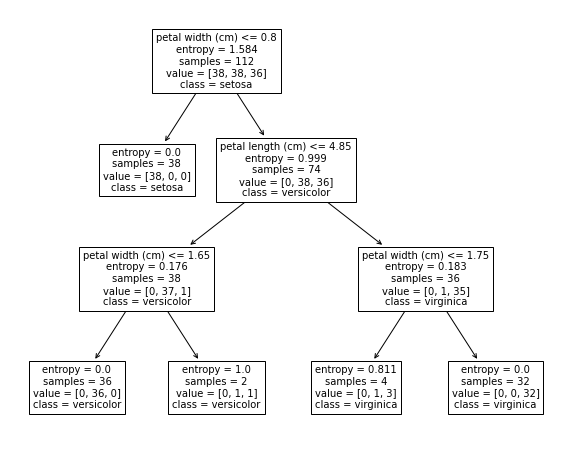

In [9]:
plt.figure(figsize=(10, 8))
plot_tree(dtree, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [10]:
dtree.feature_importances_

array([0.       , 0.       , 0.3524419, 0.6475581])

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
#Grid Search for hyperparameter optimization

In [13]:
X = iris.data
y = iris.target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [16]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [17]:
cross_val_score(dtree, X_train, y_train, cv=10)

array([1.        , 1.        , 1.        , 0.91666667, 0.91666667,
       0.91666667, 0.91666667, 1.        , 0.83333333, 1.        ])

In [18]:
params = {"max_depth":[3,5,7], "min_samples_split":[2,3,4]}

In [19]:
search = GridSearchCV(dtree, params, cv=5)

In [20]:
search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7],
                         'min_sa

In [21]:
#Get Best Paramaters
search.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [22]:
#Put best parameters
decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=2)

In [23]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
y_pred = decision_tree.predict(X_test)

In [25]:
accuracy_score(y_pred, y_test)

0.9666666666666667

#### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rnd_forest = RandomForestClassifier(n_estimators=30)

In [28]:
rnd_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
y_pred = rnd_forest.predict(X_test)

In [30]:
y_pred

array([2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1,
       2, 0, 2, 2, 2, 2, 0, 0])

In [31]:
y_test

array([2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1,
       2, 0, 1, 2, 2, 2, 0, 0])

In [32]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [33]:
rnd_forest.feature_importances_

array([0.0951948 , 0.02814184, 0.38546063, 0.49120274])

In [34]:
X = X[:, [2,3]]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
rnd_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
rnd_forest.feature_importances_

array([0.43051272, 0.56948728])

In [38]:
y_pred = rnd_forest.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred)

0.9473684210526315

In [40]:
from mlxtend.plotting import plot_decision_regions

C:\Users\atish\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


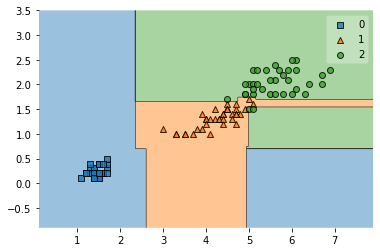

In [41]:
plot_decision_regions(X_train, y_train, rnd_forest)
plt.show()